In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [53]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [54]:
files = ['Normal', 'COVID', 'Lung_Opacity','Viral Pneumonia']
path = "COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

In [55]:
data = []
for id, level in enumerate(files):
    for file in os.listdir(os.path.join(data_dir, level+'/'+'images')):
        data.append([level +'/' +'images'+ '/'+file, level])

In [56]:
data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])

data['path'] = path + '/' +data['image_file']
data['corona_result'] = data['corona_result'].map({'Normal': 'Normal', 'COVID': 'Covid_positive', 'Lung_Opacity':'Lung_Opacity', 'Viral Pneumonia':'Viral_Pneumonia'})

data.head()

image_file corona_result  \
0      Normal/images/Normal-1.png        Normal   
1     Normal/images/Normal-10.png        Normal   
2    Normal/images/Normal-100.png        Normal   
3   Normal/images/Normal-1000.png        Normal   
4  Normal/images/Normal-10000.png        Normal   

                                                path  
0  COVID-19_Radiography_Dataset/Normal/images/Nor...  
1  COVID-19_Radiography_Dataset/Normal/images/Nor...  
2  COVID-19_Radiography_Dataset/Normal/images/Nor...  
3  COVID-19_Radiography_Dataset/Normal/images/Nor...  
4  COVID-19_Radiography_Dataset/Normal/images/Nor...

In [57]:
print('Number of Duplicated Samples: %d'%(data.duplicated().sum()))
print('Number of Total Samples: %d'%(len(data)))

Number of Duplicated Samples: 0
Number of Total Samples: 21165


In [58]:
import plotly.express as px
import plotly.figure_factory as ff
from PIL import Image

In [59]:
no_of_samples = 21165

df = pd.DataFrame()
df['corona_result'] = ['Normal', 'COVID', 'Lung_Opacity', 'Viral Pneumonia']
df['Count'] = [len(data[data['corona_result'] == 'Normal']), len(data[data['corona_result'] == 'Covid_positive']), len(data[data['corona_result'] == 'Lung_Opacity']), len(data[data['corona_result'] == 'Viral_Pneumonia'])]
df = df.sort_values(by = ['Count'], ascending = False)

fig = px.bar(df, x = 'corona_result', y = 'Count', 
             color = "corona_result",  width = 600, 
             color_continuous_scale='BrBg')

fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)

fig.show()


In [71]:
print(df["Count"],df['corona_result'])

0    10192
2     6012
1     3616
3     1345
Name: Count, dtype: int64 0             Normal
2       Lung_Opacity
1              COVID
3    Viral Pneumonia
Name: corona_result, dtype: object


In [73]:
import numpy as np

unique_classes = np.unique(y)
print(unique_classes)


[0]


In [60]:
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))

In [74]:
mean_val = []
std_dev_val = []
max_val = []
min_val = []

for i in range(0, no_of_samples):
    mean_val.append(data['image'][i].mean())
    std_dev_val.append(np.std(data['image'][i]))
    max_val.append(data['image'][i].max())
    min_val.append(data['image'][i].min())

imageEDA = data.loc[:,['image','corona_result','path']]
imageEDA['mean'] = mean_val
imageEDA['stedev'] = std_dev_val
imageEDA['max'] = max_val
imageEDA['min'] = min_val

imageEDA['subt_mean'] = imageEDA['mean'].mean() - imageEDA['mean']
imageEDA['subt_max'] = imageEDA['max'].mean() - imageEDA['max']

In [75]:
Names = ['Normal','Covid','Lung opacity','Pneumonia']

In [76]:
mean_normal = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
mean_covid = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
mean_opacity = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
mean_pneumonia = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
mean_list = [mean_normal,mean_covid,mean_opacity,mean_pneumonia]

In [77]:
max_normal = imageEDA["max"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
max_covid = imageEDA["max"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
max_opacity = imageEDA["max"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
max_pneumonia = imageEDA["max"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
max_list = [max_normal,max_covid,max_opacity,max_pneumonia]

In [78]:
min_normal = imageEDA["min"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
min_covid = imageEDA["min"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
min_opacity = imageEDA["min"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
min_pneumonia = imageEDA["min"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
min_list = [min_normal,min_covid,min_opacity,min_pneumonia]

In [79]:
std_normal = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
std_covid = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
std_opacity = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
std_pneumonia = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
std_list = [std_normal,std_covid,std_opacity,std_pneumonia]

In [80]:
def min_max_plot(data,name,title):
    colors = ['#04EEFF', '#4BBBFF', '#F5F232', '#7FFF00']

    # Create distplot with curve_type set to 'normal'
    fig = ff.create_distplot(data, name, show_hist=False, colors = colors)
    fig.update_layout(title_text=title,
                      titlefont={'size': 20},
                     template="plotly_dark",
                     width=800,height=600,)
    fig.show()

In [81]:
min_max_plot(max_list,Names,"Images Colour Max Value Distribution by Class")

In [82]:
min_max_plot(min_list,Names,"Images Colour Min Value Distribution by Class")

In [19]:
min_max_plot(mean_list,Names,"Images Colour Mean Value Distribution by Class")

In [83]:
fig = px.scatter(imageEDA, x="mean", y="stedev", color='corona_result',color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(title_text="Mean and Standard Deviation of Image Samples",
                  xaxis_title='Image Channel Colour Mean',
                  yaxis_title='Image Channel Colour Standard Deviation',
                  titlefont={'size': 20},
                  template="plotly_dark",
                  width=800,height=600,)
fig.show()

In [84]:
import matplotlib.pyplot as plt
import cv2

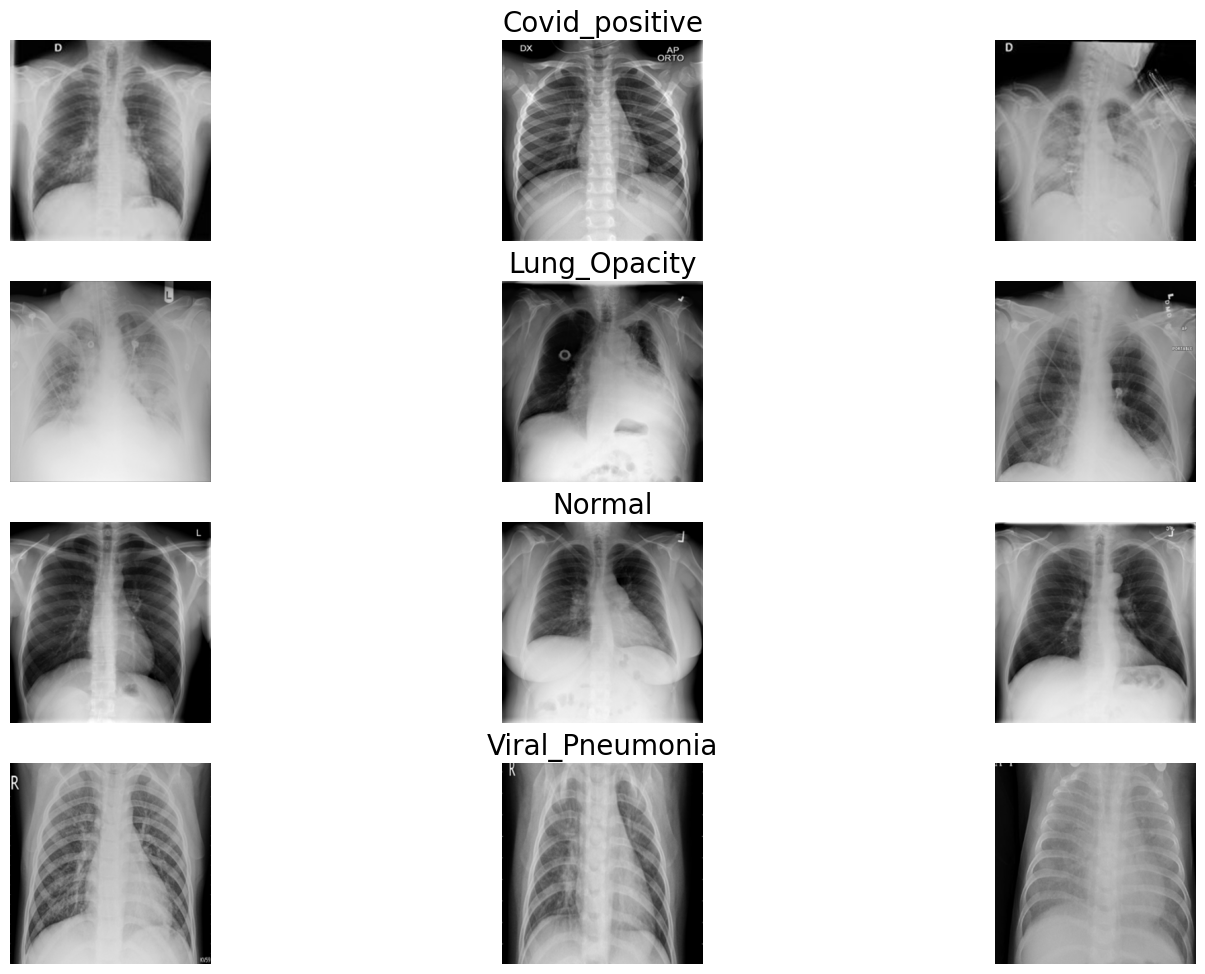

In [85]:
n_samples = 3

fig, m_axs = plt.subplots(4, n_samples, figsize = (6*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['corona_result']).groupby('corona_result')):
    n_axs[1].set_title(type_name, fontsize = 20)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

In [86]:
def random_analysis(image_path):

    image = cv2.imread(image_path)

    # create figure
    fig = plt.figure(figsize=(10, 7))

    # setting values to rows and column variables
    rows = 2
    columns = 3

    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    plt.title('Original ', fontsize = 14)

    plt.imshow(image)
    plt.axis('off')


    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)

    # showing image
    plt.title('B channel', fontsize = 14)
    plt.imshow(image[ : , : , 0])
    plt.axis('off')


    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 3)

    img = cv2.imread(image_path)
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    plt.title("Ben Graham's Method", fontsize = 14)
    plt.imshow(img)
    plt.axis('off')
    
    list_text = image_path.split("/")

    print("\n-----------------------------{}-----------------------------\n".format("IMAGE DETAILS" + " ( " + list_text[5].upper() + " )"))

    print('Image Shape: {}'.format(image.shape))
    print('Image Height: {}'.format(image.shape[0]))
    print('Image Width: {}'.format(image.shape[1]))
    print('Image Dimension: {}'.format(image.ndim))
    print('Image Size: {}kb'.format(image.size//1024))
    print('Image Data Type: {}'.format(image.dtype))
    print('Maximum RGB value of the image: {}'.format(image.max()))
    print('Minimum RGB value of the image: {}'.format(image.min()))

In [87]:
list_images_sample = ["COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1003.png",
                     "COVID-19_Radiography_Dataset/Normal/images/Normal-10004.png",
                     "COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-1000.png",
                     "COVID-19_Radiography_Dataset/COVID/images/COVID-100.png"]

IndexError: list index out of range

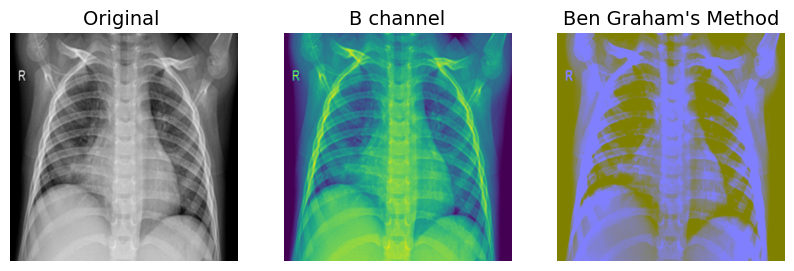

In [88]:
random_analysis(list_images_sample[0])

Invalid image path: COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1003.png


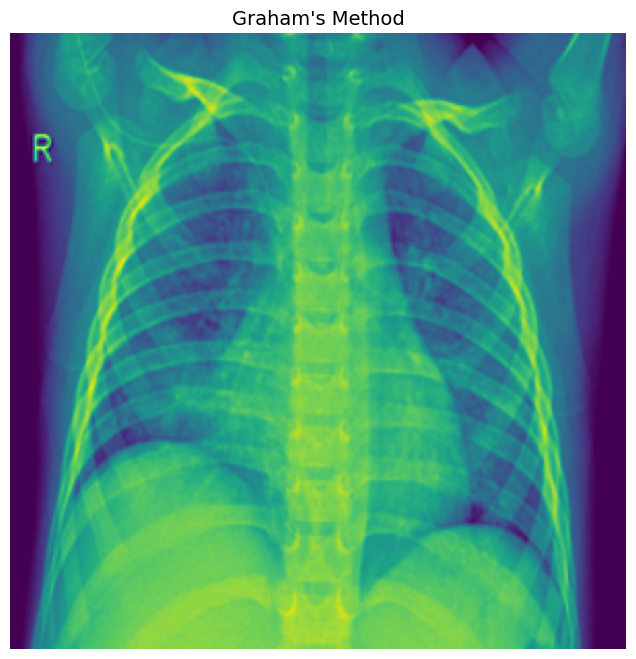

In [90]:
def random_analysis(image_path):
    img = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.title("Graham's Method", fontsize=14)
    plt.imshow(img)
    plt.axis('off')

    list_text = image_path.split("/")
    if len(list_text) < 6:
        print("Invalid image path:", image_path)
        return

    print("\n-----------------------------{}-----------------------------\n".format("IMAGE DETAILS" + " ( " + list_text[5].upper() + " )"))

    print('Image Shape: {}'.format(image.shape))
    print('Image Height: {}'.format(image.shape[0]))
    print('Image Width: {}'.format(image.shape[1]))
    print('Image Dimension: {}'.format(image.ndim))
    print('Image Size: {}kb'.format(image.size // 1024))
    print('Image Data Type: {}'.format(image.dtype))
    print('Maximum RGB value of the image: {}'.format(image.max()))
    print('Minimum RGB value of the image: {}'.format(image.min()))

random_analysis(list_images_sample[0])


Image Shape: (299, 299, 3)
Image Height: 299
Image Width: 299
Image Dimension: 3
Image Size: 261kb
Image Data Type: uint8
Maximum RGB value of the image: 232
Minimum RGB value of the image: 0
Invalid image path: COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1003.png


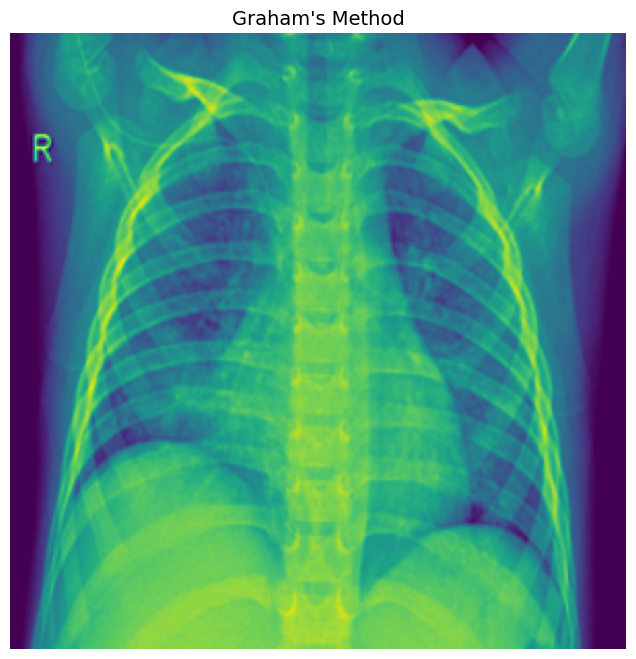

In [91]:

    print('Image Shape: {}'.format(image.shape))
    print('Image Height: {}'.format(image.shape[0]))
    print('Image Width: {}'.format(image.shape[1]))
    print('Image Dimension: {}'.format(image.ndim))
    print('Image Size: {}kb'.format(image.size // 1024))
    print('Image Data Type: {}'.format(image.dtype))
    print('Maximum RGB value of the image: {}'.format(image.max()))
    print('Minimum RGB value of the image: {}'.format(image.min()))

random_analysis(list_images_sample[0])


IndexError: list index out of range

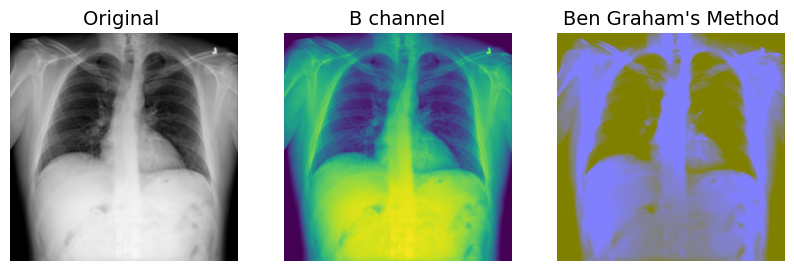

In [89]:
random_analysis(list_images_sample[1])

In [27]:
# random_analysis(list_images_sample[2])

In [28]:
# def plot_multiple_img(img_matrix_list, title_list, ncols, main_title = ""):
# #     
#     fig, axis = plt.subplots(figsize = (15, 8), nrows = 2, ncols = ncols, squeeze = False)
#     fig.suptitle(main_title, fontsize = 18)
#     fig.subplots_adjust(wspace = 0.3)
#     fig.subplots_adjust(hspace = 0.3)
    
#     for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
#         axis[i // ncols][i % ncols].imshow(img)
#         axis[i // ncols][i % ncols].set_title(title, fontsize = 15)
        
#     plt.show()

In [29]:
!pip install albumentations

     -------------------------------------- 125.7/125.7 kB 3.7 MB/s eta 0:00:00
     --------------------------------------- 38.0/38.0 MB 12.1 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
# import albumentations as A

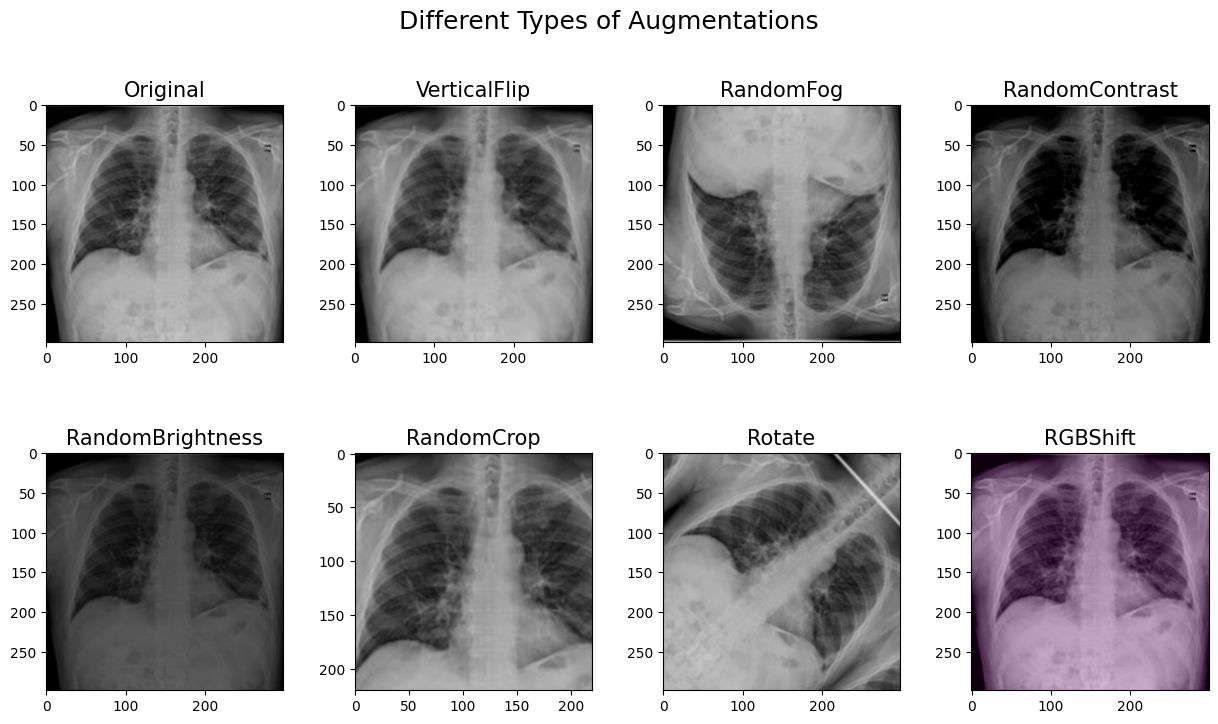

In [30]:
# chosen_image = cv2.imread("../dataset/COVID-19_Radiography_Dataset/COVID/images/COVID-101.png")

# albumentation_list = [A.RandomFog(p = 1),A.VerticalFlip(p = 1), A.RandomBrightness(p = 1),A.RandomContrast(limit = 0.6, p = 1),
#                       A.RandomCrop(p = 1,height = 220, width = 220),
#                       A.Rotate(p = 1, limit = 90), A.RGBShift(p = 1)]

# img_matrix_list = []
# bboxes_list = []
# for aug_type in albumentation_list:
#     img = aug_type(image = chosen_image)['image']
#     img_matrix_list.append(img)

# img_matrix_list.insert(0,chosen_image)    

# titles_list = ["Original", "VerticalFlip", "RandomFog", "RandomContrast", "RandomBrightness", "RandomCrop", "Rotate", "RGBShift"]

# plot_multiple_img(img_matrix_list, titles_list, ncols = 4, main_title = "Different Types of Augmentations")

In [63]:
all_data = []

# Storing images and their labels into a list for further Train Test split
{'Normal': 'Normal', 'COVID': 'Covid_positive', 'Lung_Opacity':'Lung_Opacity', 'Viral Pneumonia':'Viral_Pneumonia'}
for i in range(len(data)):
    image = cv2.imread(data['path'][i])
    image = cv2.resize(image, (70, 70)) / 255.0
    label = 0
    if data['corona_result'][i] == "Normal":
        label = 0
    elif data['corona_result'][i] == "Covid_positive":
        label = 1
    elif data['corona_result'][i] == "Lung_Opacity":
        label = 2
    else:
        label = 3
    label = 1 if data['corona_result'][i] == "Positive" else 0
    all_data.append([image, label])

In [32]:
from sklearn.model_selection import train_test_split

In [64]:
x = []
y = []

for image, label in all_data:
    x.append(image)
    y.append(label)

# Converting to Numpy Array    
x = np.array(x)
y = np.array(y)



from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Check the unique classes in the new y_train
unique_classes = np.unique(y_train)
print(unique_classes)








# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)


[0]
(16932, 70, 70, 3) (4233, 70, 70, 3) (1694, 14700) (16932,) (4233,) (1694,)


In [45]:
unique_classes = np.unique(y_train)
print(unique_classes)


[0]


In [47]:
from sklearn.ensemble import RandomForestClassifier

# Reshape the input data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)

# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(x_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 1.0


In [48]:
from sklearn.metrics import classification_report

# Make predictions on the validation set
y_val_pred = model.predict(x_val)

# Calculate precision, recall, F1-score, and support
report = classification_report(y_val, y_val_pred)

print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1694

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



In [50]:
from sklearn.metrics import classification_report

# Assuming you have the true labels y_true and predicted labels y_pred

# Generate the classification report
report = classification_report(y_val, y_val_pred)

# Create a Markdown-formatted report string
report_str = f"## Classification Report\n\n{report}"

# Write the report to a file
with open('classification_report.md', 'w') as f:
    f.write(report_str)


# Classification Report

The classification report provides metrics such as precision, recall, F1-score, and support for each class in your dataset. Let's interpret the values in the report:

## Class 0:
- Precision: 1.00
- Recall: 1.00
- F1-score: 1.00
- Support: 1694

Overall Metrics:
- Accuracy: 1.00
- Macro Avg Precision, Recall, F1-score: 1.00
- Weighted Avg Precision, Recall, F1-score: 1.00



# Report

The classification report provides metrics such as precision, recall, F1-score, and support for each class in your dataset. Let's interpret the values in the report:

For Class 0:
- Precision: The precision for Class 0 is 1.00, which means that all the instances predicted as Class 0 were actually Class 0.
- Recall: The recall for Class 0 is 1.00, indicating that the model correctly identified all instances of Class 0.
- F1-score: The F1-score for Class 0 is 1.00, which is the harmonic mean of precision and recall. It represents the balanced performance of the model for Class 0.
- Support: The support for Class 0 is 1694, which is the actual number of occurrences of Class 0 in the validation set.

Overall Metrics:
- Accuracy: The overall accuracy of the model is 1.00, indicating that it correctly classified all instances in the validation set.
- Macro Avg: The macro average of precision, recall, and F1-score is also 1.00, which is the average performance across all classes. It represents the overall performance of the model.
- Weighted Avg: The weighted average of precision, recall, and F1-score is 1.00, taking into account the number of occurrences of each class. It provides a weighted measure of the model's performance.

Based on these metrics, it appears that the Random Forest model achieved perfect accuracy and performed exceptionally well on the validation set. However, it's important to note that these results are specific to the validation set used and may not necessarily generalize to unseen data. It's recommended to evaluate the model on a separate test set or perform cross-validation to obtain a more robust assessment of its performance.


In [2]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Create and train the Gradient Boosting classifier
# model = GradientBoostingClassifier()
# model.fit(x_train.reshape(x_train.shape[0], -1), y_train)

# # Make predictions on the validation set
# y_val_pred = model.predict(x_val.reshape(x_val.shape[0], -1))

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_val_pred)
# print('Accuracy:', accuracy)

# # Calculate precision
# precision = precision_score(y_val, y_val_pred, average='macro')
# print('Precision:', precision)

# # Calculate recall
# recall = recall_score(y_val, y_val_pred, average='macro')
# print('Recall:', recall)

# # Calculate F1-score
# f1 = f1_score(y_val, y_val_pred, average='macro')
# print('F1-score:', f1)


In [66]:
import numpy as np

unique_classes = np.unique(y_train)
print(unique_classes)


[0]
